# Data Understanding

In [2]:
#The problem is to classify images of people doing different yoga poses using deep learning, 
#specifically image recognition algorithms such as CNNs. 
#The challenge is that the differences between poses may be subtle and there may be variations between individuals performing the same pose.
#To address this, 
#a large dataset of labeled images is required for training the classification model,
#and validation data is needed to check the accuracy of the model.
#The problem requires expertise in deep learning, image processing, and yoga.

In [3]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle           
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import zipfile
from tensorflow.keras.applications import VGG19
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import plotly.express as px
from tensorflow.keras.applications import Xception

In [4]:
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150,150)


In [5]:
#distrubition of our dataset

In [6]:
fig = px.pie(
    names=class_names,
    values=class_names_label,
    title="Class Distribution",
)
fig.update_layout({'title':{
    'x':0.5
}})
fig.show()

In [7]:
#number of image for each category

In [8]:
#These augmentation techniques help to increase the diversity of the training data and can improve the performance 
#of the model by making it more robust to variations in the input data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory("C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TRAIN",
                                                   batch_size=16,
                                            class_mode='categorical',
                                            target_size=(150, 150),
                                                    shuffle=True)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory("C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TEST",
                                                  batch_size=1,
                                            class_mode='categorical',
                                                target_size=(150, 150),
                                                    shuffle=False)

Found 1075 images belonging to 5 classes.
Found 466 images belonging to 5 classes.


In [10]:
#After processing all subdirectories in the current directory, 
#the function returns the output list containing the image data and labels for both the training and test sets.

In [11]:
def load_data():
   
    datasets = ["C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TRAIN", 
                "C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TEST"]
    output = []
    
    # Iterate through the training and test set.
    for dataset in datasets:
        
        images = [] 
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each Subfolder corresponding to a category  
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE) 
                
                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        # Shuffle the images to introduce some randomness in our data
        images, labels = shuffle(images, labels)
        
        
        output.append((images, labels))

    return output

In [12]:
#This line of code assigns the output of the load_data() function to four variables: 
#train_images, train_labels, test_images, and test_labels.

In [13]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TRAIN


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:15<00:00, 16.64it/s]


Loading C:/Users/chiheb/Downloads/YOGA/content/cleaned/DATASET/TEST


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:06<00:00, 16.15it/s]


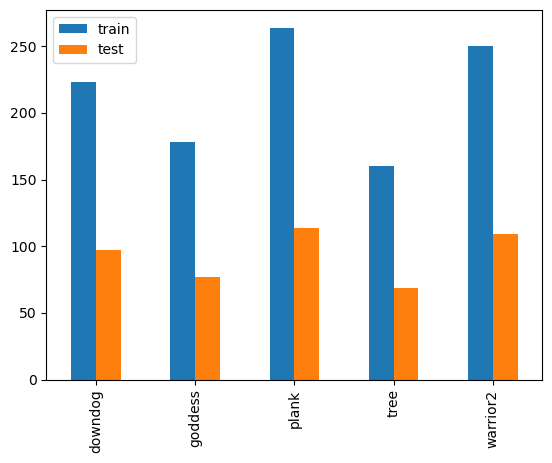

In [14]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Models

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, batch_size = 28, epochs=15, validation_split = 0.3)

Epoch 1/15
27/27 [==============================] - 19s 585ms/step - loss: 1.6051 - accuracy: 0.2340 - val_loss: 1.6001 - val_accuracy: 0.3467
Epoch 2/15
27/27 [==============================] - 14s 535ms/step - loss: 1.5597 - accuracy: 0.2992 - val_loss: 1.4145 - val_accuracy: 0.4025
Epoch 3/15
27/27 [==============================] - 15s 569ms/step - loss: 1.4477 - accuracy: 0.4016 - val_loss: 1.3650 - val_accuracy: 0.5015
Epoch 4/15
27/27 [==============================] - 16s 580ms/step - loss: 1.3585 - accuracy: 0.4508 - val_loss: 1.2475 - val_accuracy: 0.5201
Epoch 5/15
27/27 [==============================] - 16s 584ms/step - loss: 1.2575 - accuracy: 0.5027 - val_loss: 1.0953 - val_accuracy: 0.5635
Epoch 6/15
27/27 [==============================] - 15s 558ms/step - loss: 1.1043 - accuracy: 0.5505 - val_loss: 0.9705 - val_accuracy: 0.6223
Epoch 7/15
27/27 [==============================] - 14s 533ms/step - loss: 0.9584 - accuracy: 0.6130 - val_loss: 0.9726 - val_accuracy: 0.5697

In [20]:
#To visualize how our model is performing, we plot the accuracy and the loss during the training

In [21]:
def plot_performance(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training_accuracy vs Validation_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training_loss vs Validation_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

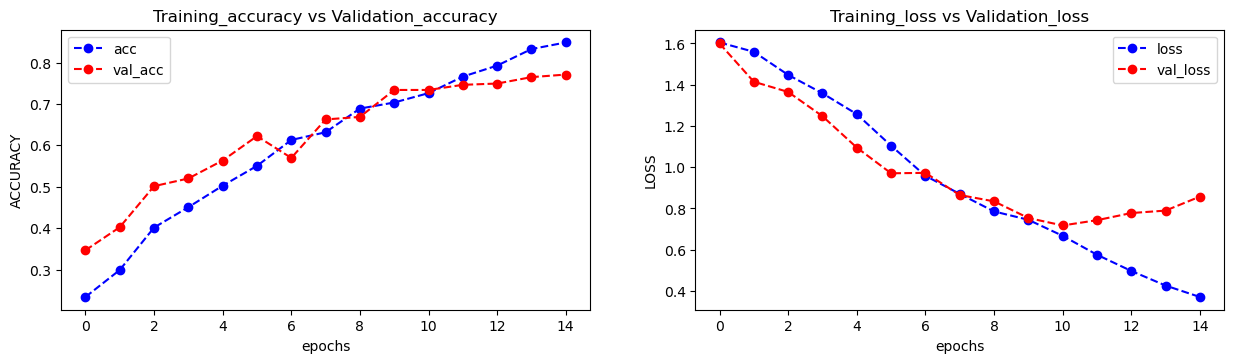

In [22]:
plot_performance(history)

In [23]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 2s 153ms/step - loss: 0.5351 - accuracy: 0.8670


In [24]:
#We now make predictions on the test data set.

In [25]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  # np.argmax is used since each prediction would be an array of...
                                             # probabilities and we need to pick the max value. 
pred_labels

15/15 [==============================] - 2s 143ms/step


array([3, 4, 4, 1, 3, 4, 0, 0, 1, 4, 0, 1, 1, 4, 4, 2, 3, 4, 0, 2, 1, 3,
       1, 0, 2, 2, 3, 3, 3, 1, 2, 4, 3, 4, 4, 1, 0, 3, 4, 2, 2, 1, 4, 4,
       2, 1, 0, 4, 2, 4, 3, 4, 2, 1, 0, 4, 0, 2, 2, 3, 2, 4, 0, 1, 2, 2,
       1, 2, 1, 1, 4, 1, 1, 2, 4, 3, 4, 2, 3, 0, 1, 0, 2, 3, 2, 4, 2, 2,
       4, 2, 4, 2, 0, 1, 4, 2, 2, 2, 1, 4, 1, 3, 3, 0, 0, 1, 3, 4, 1, 2,
       3, 2, 0, 2, 4, 4, 4, 4, 4, 4, 1, 0, 2, 2, 0, 2, 0, 2, 4, 2, 2, 3,
       4, 1, 1, 2, 1, 1, 4, 2, 4, 1, 2, 1, 4, 2, 0, 1, 2, 4, 2, 0, 3, 3,
       1, 0, 2, 0, 2, 4, 4, 4, 1, 4, 2, 2, 2, 4, 4, 2, 3, 3, 2, 3, 2, 1,
       0, 2, 2, 4, 0, 4, 2, 2, 3, 4, 3, 0, 2, 1, 4, 1, 2, 1, 1, 2, 4, 1,
       1, 0, 3, 1, 3, 4, 1, 0, 2, 1, 1, 4, 2, 0, 3, 1, 4, 2, 1, 1, 0, 4,
       2, 1, 4, 4, 2, 2, 1, 4, 0, 0, 2, 0, 1, 3, 1, 0, 0, 2, 4, 0, 4, 1,
       1, 2, 0, 4, 0, 0, 4, 1, 3, 0, 4, 4, 2, 1, 4, 0, 4, 4, 2, 2, 4, 0,
       1, 4, 4, 2, 2, 1, 1, 1, 3, 3, 3, 2, 0, 1, 0, 0, 1, 1, 2, 3, 2, 3,
       0, 2, 3, 2, 4, 2, 2, 2, 1, 1, 4, 4, 1, 0, 2,

In [26]:
#Plotting the images along with their actual class and predicted class would give us a proper idea 
#about how our model is making predictions.

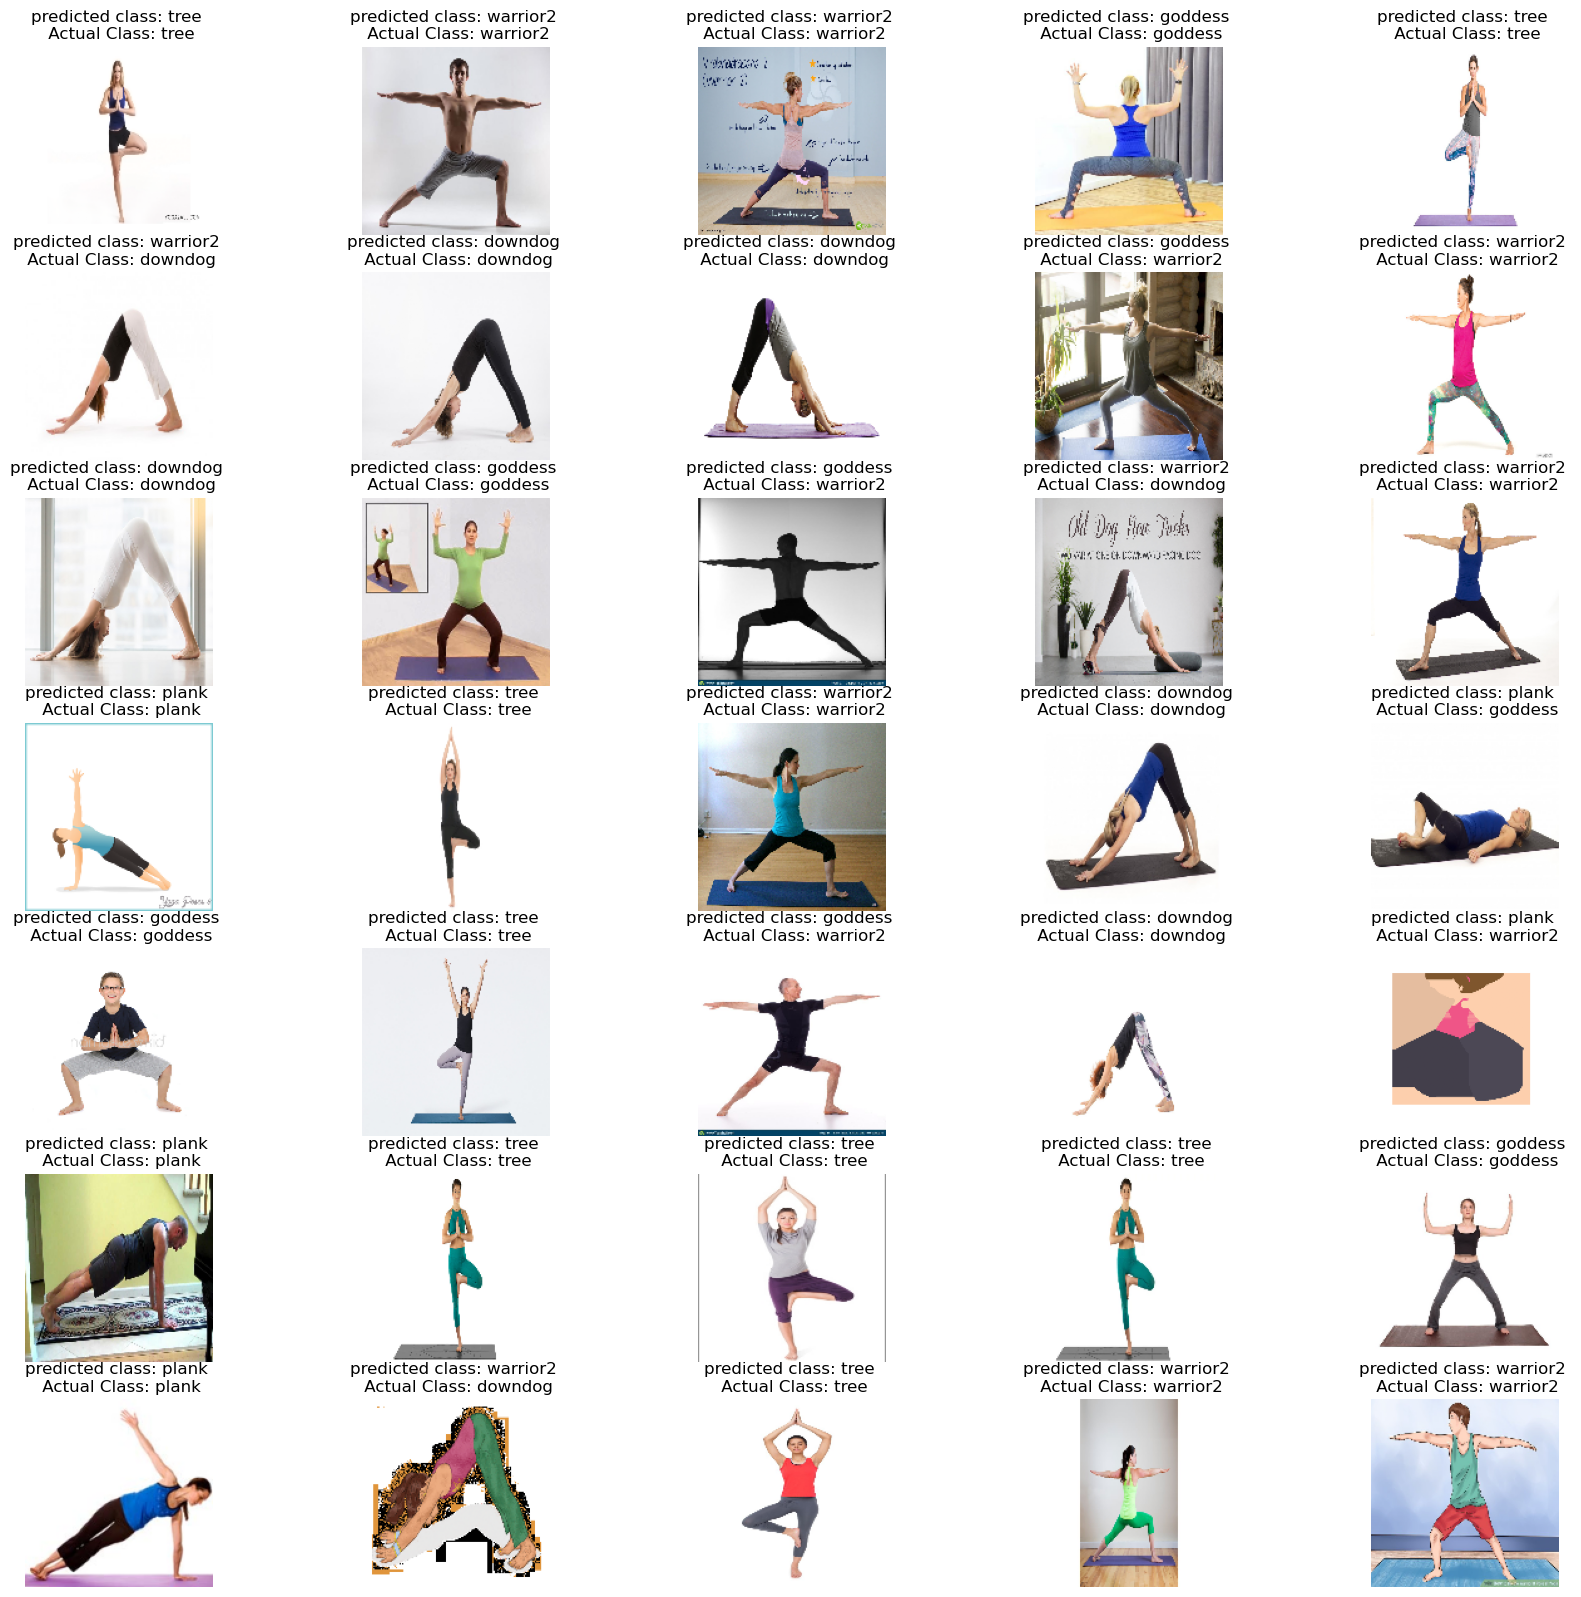

In [27]:
fig, ax = plt.subplots(7,5, figsize = (20,20))
ax = ax.ravel()

for i in range(0,35):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

# Classification Report

In [28]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_generator.classes, y_pred))

466/466 [==============================] - 28s 59ms/step
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        97
           1       0.70      0.79      0.74        77
           2       0.87      0.93      0.90       114
           3       0.95      0.90      0.93        69
           4       0.74      0.74      0.74       109

    accuracy                           0.83       466
   macro avg       0.84      0.84      0.84       466
weighted avg       0.84      0.83      0.84       466



# Confusion Matrix

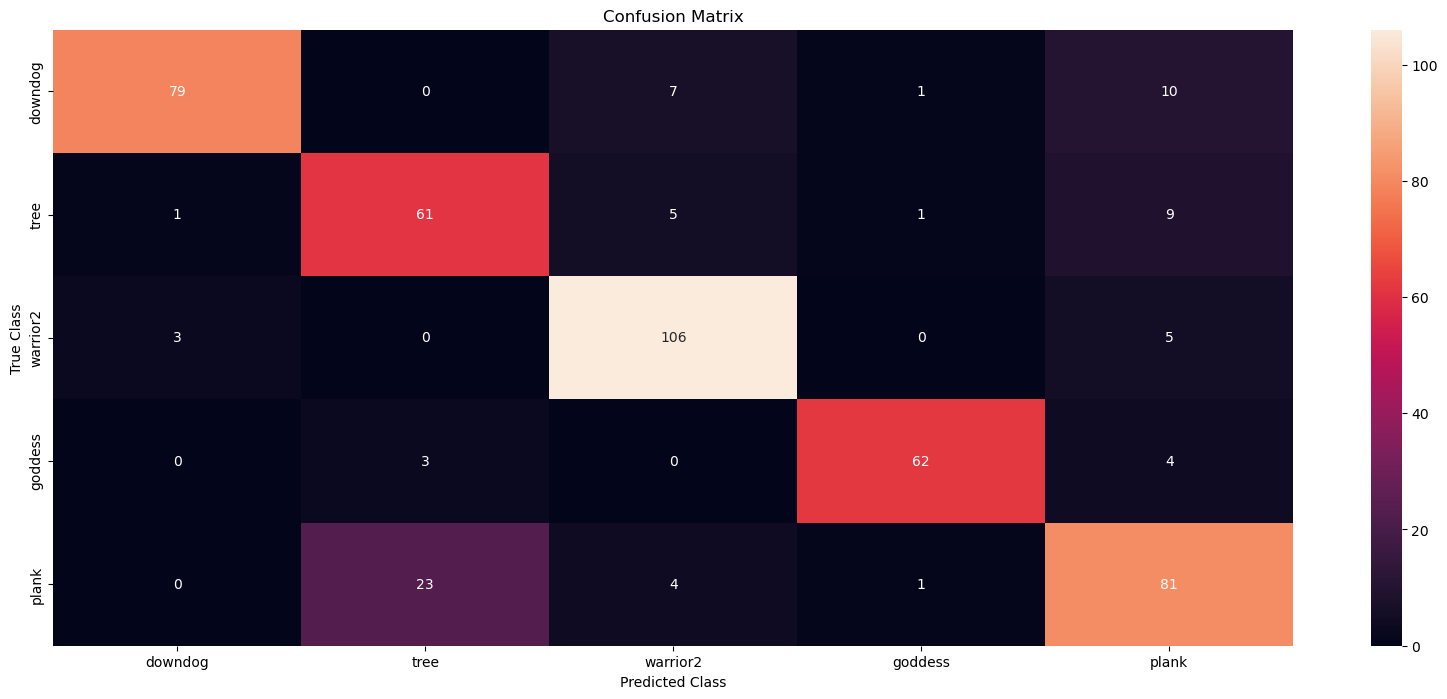

In [29]:
cf_matrix = confusion_matrix(test_generator.classes, y_pred)
Labels = ['downdog', 'tree', 'warrior2', 'goddess', 'plank']
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()